# Comcast Telecom Consumer Complaints

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Importing data

In [2]:
df_complaints = pd.read_csv("E:\python project\Comcast_data.csv")

In [4]:
df_complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
df_complaints["date_index"] = df_complaints["Date_month_year"] + " " + df_complaints["Time"]
df_complaints["date_index"] = pd.to_datetime(df_complaints["date_index"])
df_complaints["Date_month_year"] = pd.to_datetime(df_complaints["Date_month_year"])
df_complaints = df_complaints.set_index(df_complaints["date_index"])

##Chart for the number of complaints at monthly granularity levels

<AxesSubplot:xlabel='date_index'>

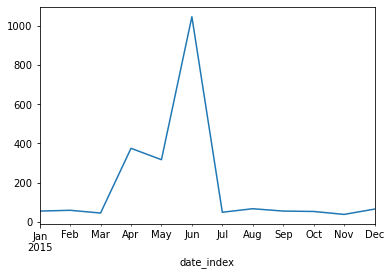

In [6]:
df_complaints.groupby(pd.Grouper(freq="M")).size().plot()

##Chart for the number of complaints at daily granularity levels

<AxesSubplot:xlabel='Day of Month'>

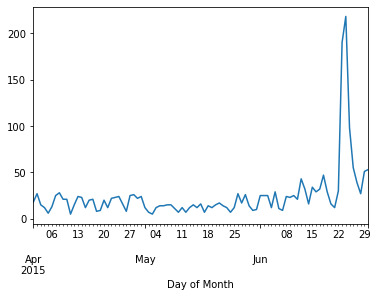

In [7]:
df_complaints['Day of Month'] = pd.to_datetime(df_complaints["Date"])
df_complaints = df_complaints.set_index(df_complaints["Day of Month"])
df_complaints.groupby(pd.Grouper(freq="D")).size().plot()

##Frequency of complaint types

In [10]:
df_type = df_complaints['Customer Complaint'].str.upper().value_counts()

In [11]:
df_type.head(25)

COMCAST                             102
COMCAST DATA CAP                     30
COMCAST INTERNET                     29
COMCAST DATA CAPS                    21
COMCAST BILLING                      18
COMCAST SERVICE                      15
INTERNET SPEED                       15
UNFAIR BILLING PRACTICES             13
DATA CAPS                            13
DATA CAP                             12
COMCAST COMPLAINT                    11
COMCAST/XFINITY                      11
COMCAST INTERNET SERVICE             10
BILLING                               9
BILLING ISSUES                        8
COMCAST CABLE                         5
INTERNET                              5
COMCAST BILLING COMPLAINT             5
COMCAST ISSUES                        5
COMCAST BILLING PRACTICES             5
SERVICE ISSUES                        5
SLOW INTERNET                         5
INTERNET SERVICE                      5
COMPLAINT AGAINST COMCAST             5
COMCAST UNFAIR BILLING PRACTICES      4


Complaint types are maximum around Comcast , Comcast data Cap , Comcast Internet , Comcast data Cap , Comcast Billing

##New categorical variable with value as Open and Closed.

Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [12]:
df_complaints["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df_complaints["Status"]]

In [13]:
df_status = df_complaints.groupby('State').newStatus.value_counts().unstack()

In [14]:
df_status.head(25)

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


<AxesSubplot:xlabel='State'>

<Figure size 20000x10000 with 0 Axes>

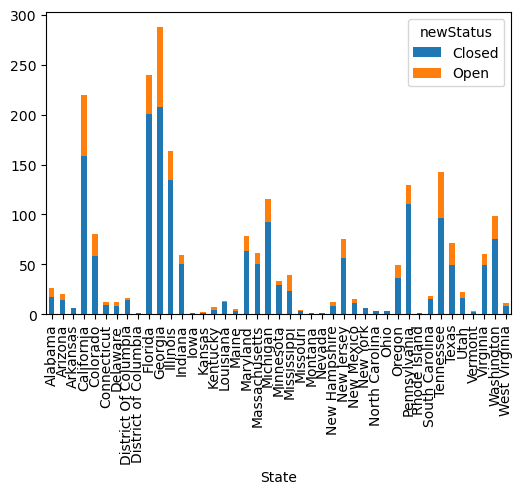

In [16]:
plt.figure(figsize=(100,50)) 
plt.rcParams['figure.dpi'] = 100
df_status.plot(kind='bar', stacked=True)

State with maximum number of complaints: Georgia

In [17]:
# Unresolved complaints distribution across States
df_unresolved = df_complaints[df_complaints['newStatus']=='Open']
colors = ['#cc566a','#5ba85f','#7f67ca','#ca6b39','#c360aa','#a7993f','#639ace']
df_unresolved = df_unresolved['State'].value_counts()
df_unresolved.head(25)

Georgia          80
California       61
Tennessee        47
Florida          39
Illinois         29
Michigan         23
Washington       23
Texas            22
Colorado         22
Pennsylvania     20
New Jersey       19
Mississippi      16
Maryland         15
Oregon           13
Massachusetts    11
Virginia         11
Indiana           9
Alabama           9
Arizona           6
Utah              6
New Hampshire     4
Delaware          4
Minnesota         4
New Mexico        4
Connecticut       3
Name: State, dtype: int64

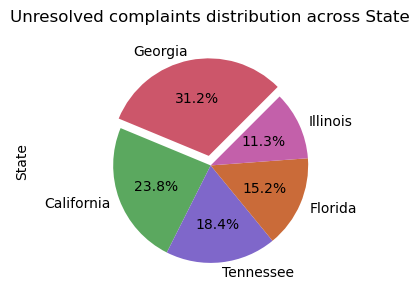

In [25]:
df_unresolved.head().plot(kind='pie',autopct='%1.1f%%',
                        explode = (0.1, 0, 0, 0, 0), startangle=45, colors = colors,
                        figsize = (4,3))
plt.axis('equal')
plt.title('Unresolved complaints distribution across State\n')
plt.tight_layout()
plt.show()

State with maximum number of unresolved complaints: Georgia

##Percentage of complaints resolved till date received via Internet & calls

In [26]:
df_received = df_complaints[df_complaints['Received Via'].isin(['Internet','Customer Care Call'])]

In [27]:
df_received.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,Day of Month,newStatus
Day of Month,,,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,2015-04-22,Closed
2015-04-08,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,2015-04-08,Closed
2015-04-18,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,2015-04-18,Closed
2015-05-07,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,2015-05-07,Open
2015-05-26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,2015-05-26,Closed


In [28]:
df_received.newStatus.value_counts()


Closed    1707
Open       517
Name: newStatus, dtype: int64

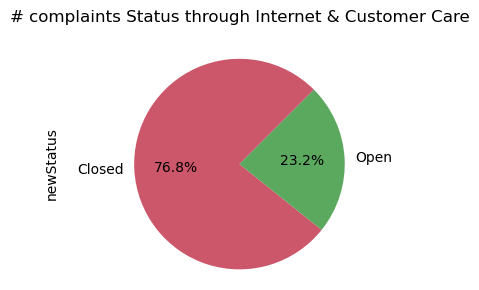

In [32]:
df_received.newStatus.value_counts().plot(kind='pie',autopct='%1.1f%%',
                         startangle=45, colors = colors,
                        figsize = (4,3))
plt.axis('equal')
plt.title('# complaints Status through Internet & Customer Care\n')
plt.tight_layout()
plt.show()

In [33]:
df_received_closed = df_received[df_received['newStatus']=='Closed']

In [34]:
df_received_closed.newStatus.value_counts()

Closed    1707
Name: newStatus, dtype: int64